In [1]:
import os
import sys
import numpy as np
import nibabel as nib
import pydicom
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from numpy import zeros, newaxis
from scipy.stats import norm
import cv2
import scipy.signal as signal
from pydicom.pixel_data_handlers.util import apply_color_lut
from skimage.filters import threshold_multiotsu
from skimage.filters import threshold_otsu, threshold_local
import SimpleITK as sitk

# Util functions

In [58]:
def read_data(path):
    nii=nib.load(path)
    data=np.asanyarray(nii.dataobj)
    
    return nii, data

def mask_brain(data,mask):
    i,j,k = data.shape
    masked=np.zeros_like(data)
    for idx in range(k):
        masked[:,:,idx]=data[:,:,idx]*mask[:,:,idx]
#         masked[:,:,idx]=  masked[:,:,idx].astype(np.int16)
        
        
    return masked

def show_data(data):
    i,j,k=data.shape
    for idx in range(k):
        plt.imshow(data[:,:,idx])
        plt.show()
        
        
def save_nii(data, nii, path2save):
    nii2save=nib.Nifti1Image(data, nii.affine)
    nib.save(nii2save, path2save)

In [44]:
path2data="/Users/mri_registration/SAMRI/samri_output/rEO_05/bids/sub-rEO_05/ses-postop250823/anat/sub-rEO_05_ses-postop250823_task-rest_acq-T1FlashMerged_T1w-ind_28.nii.gz"
path2mask="/Users/mri_registration/SAMRI/samri_output/rEO_05/bids/sub-rEO_05/ses-postop250823/anat/t1merged_mask.nii.gz"

nii_data, data=read_data(path2data)
_, mask=read_data(path2mask)

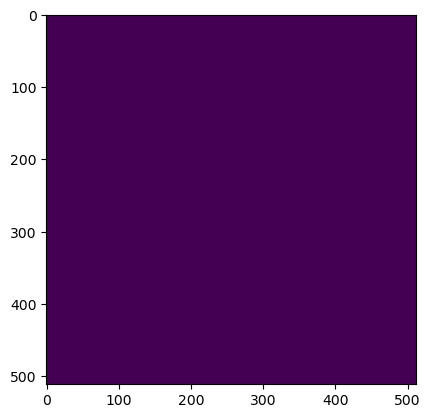

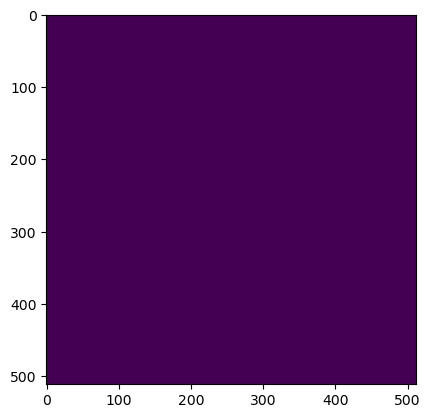

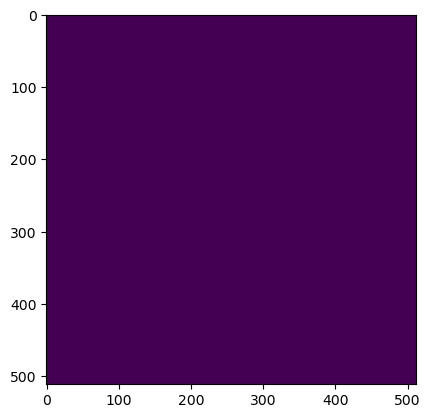

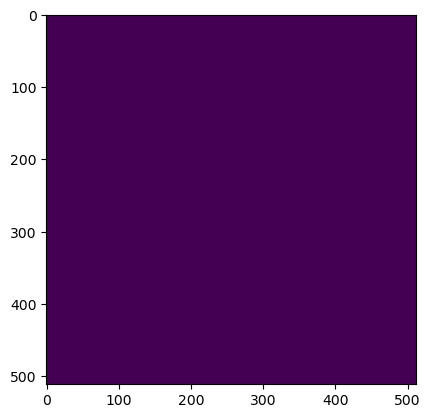

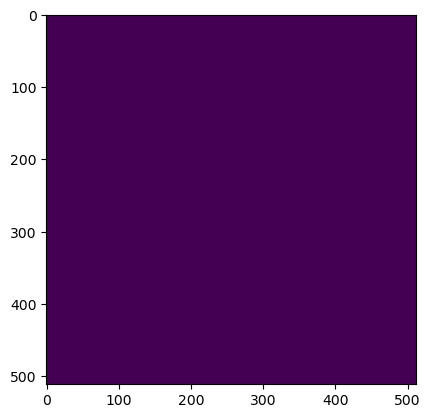

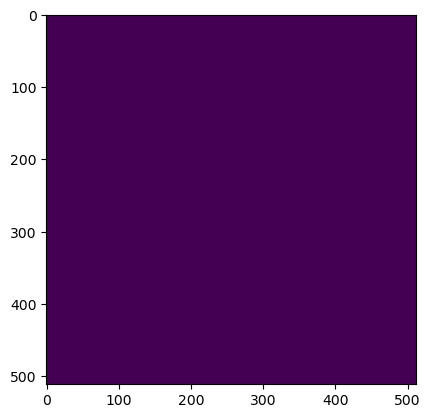

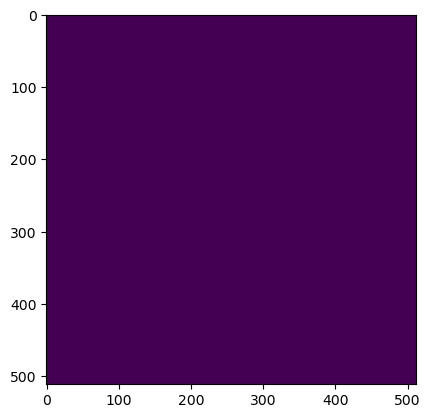

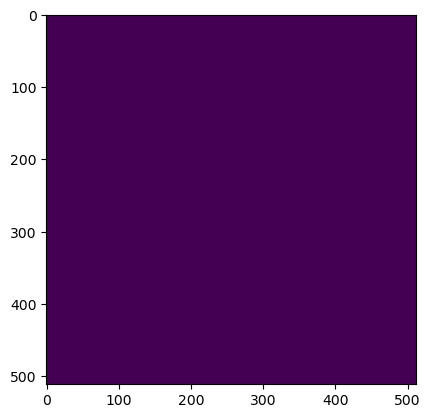

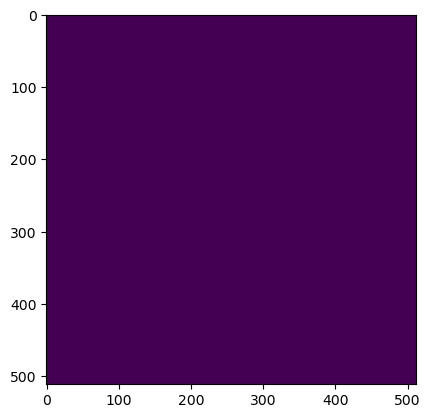

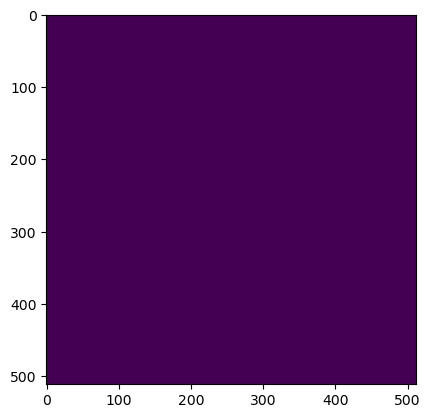

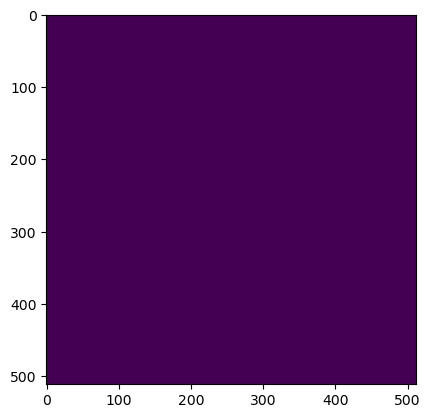

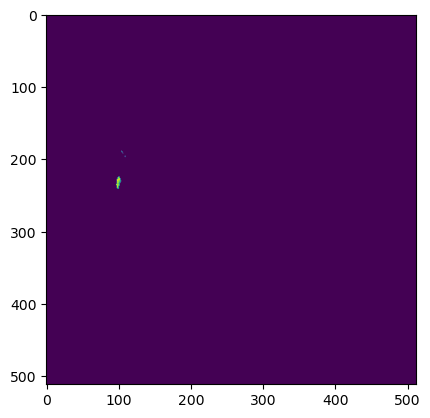

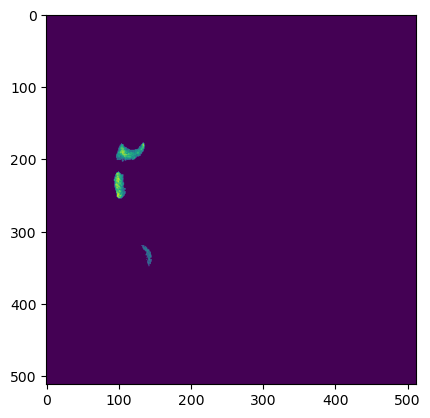

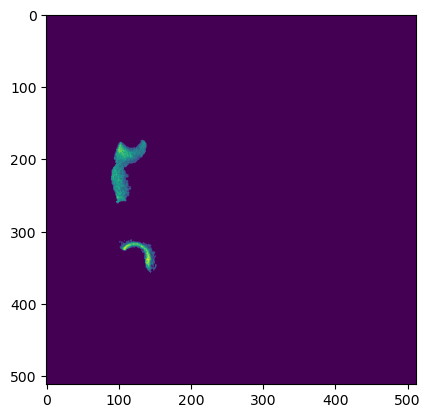

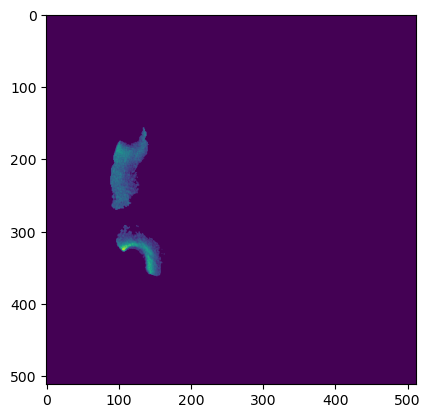

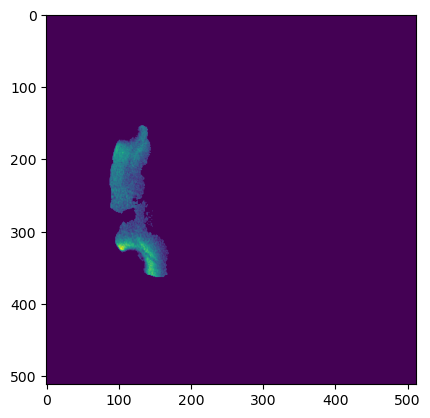

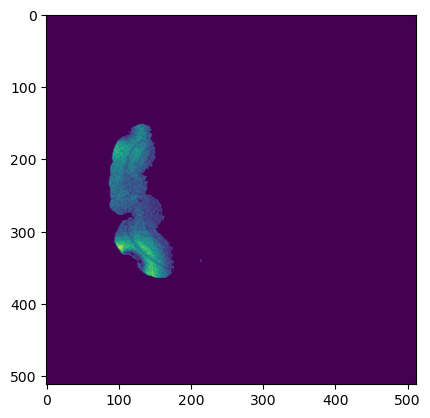

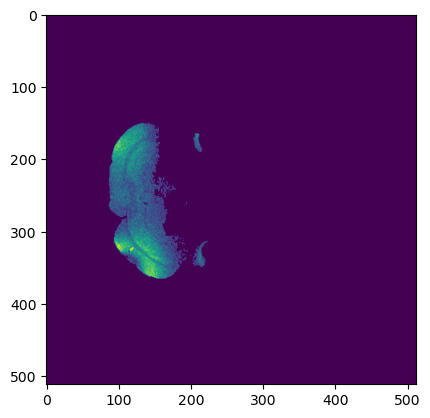

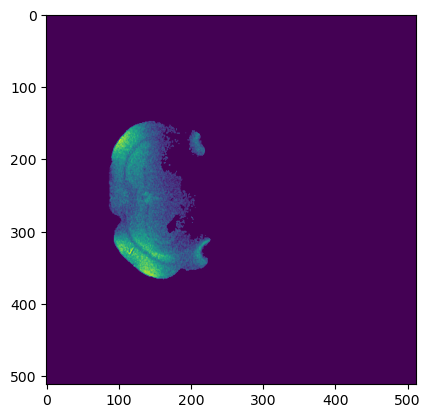

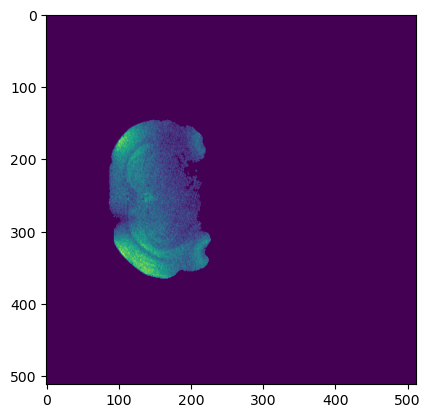

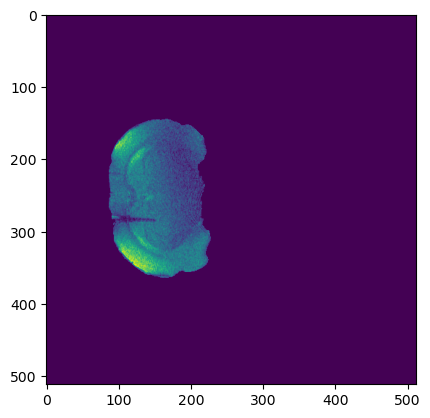

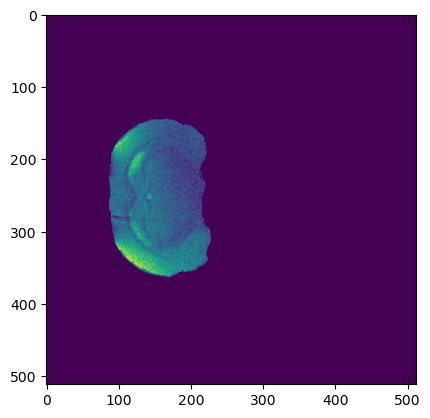

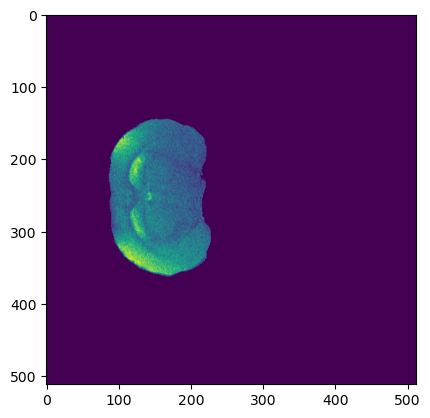

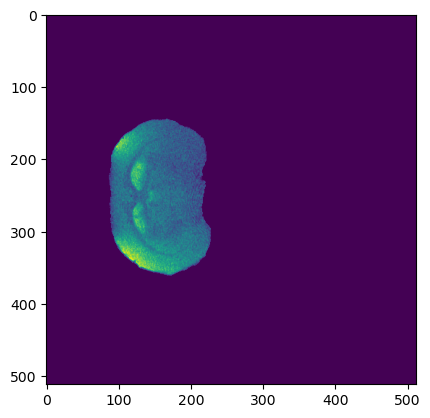

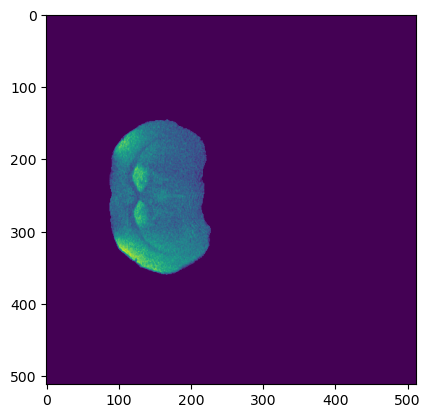

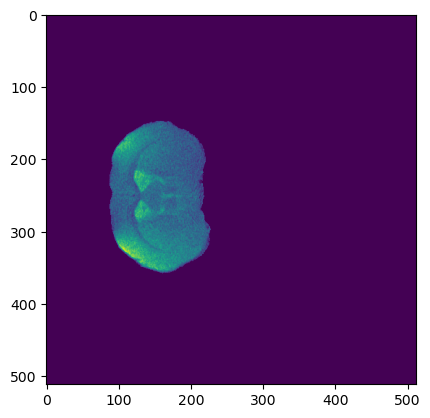

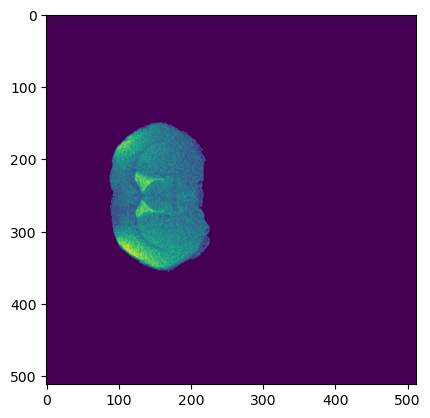

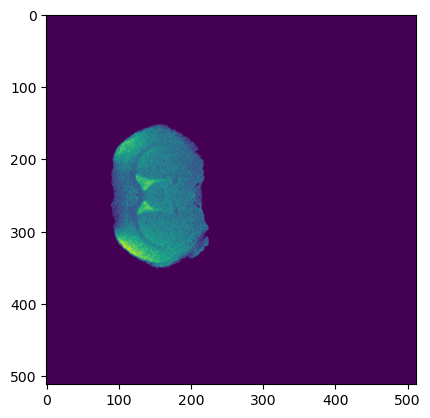

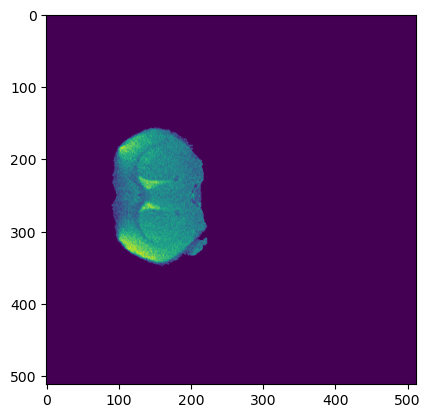

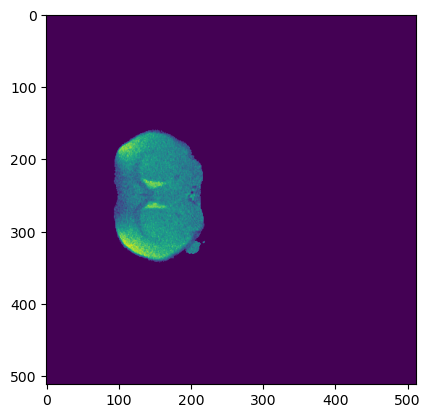

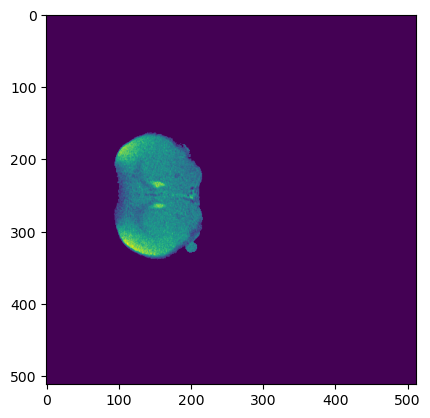

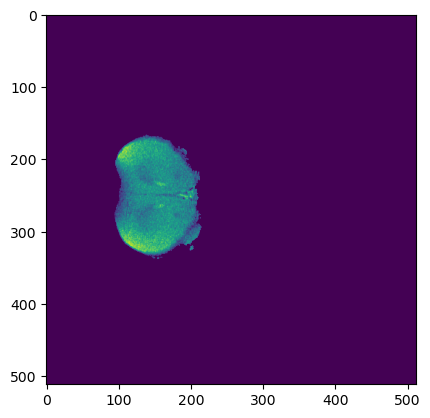

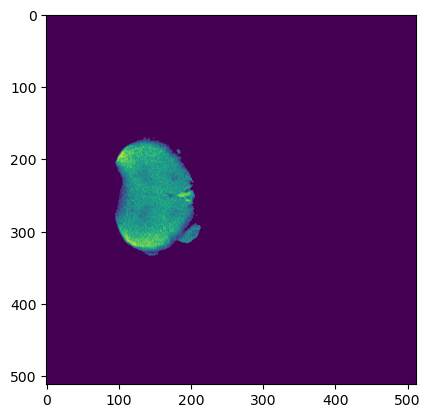

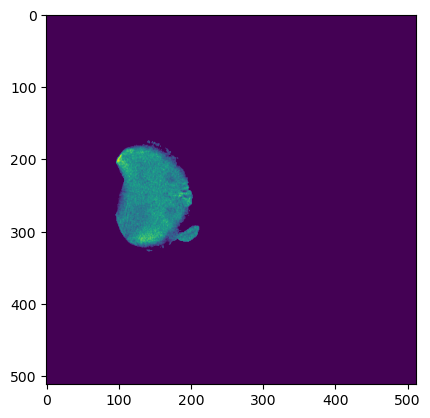

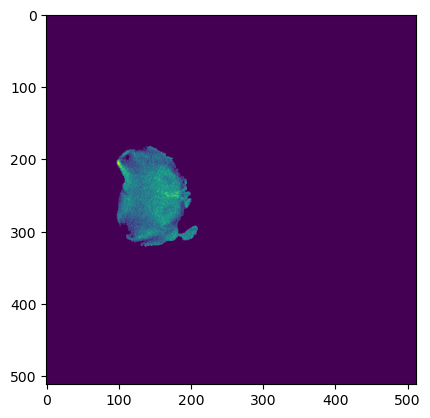

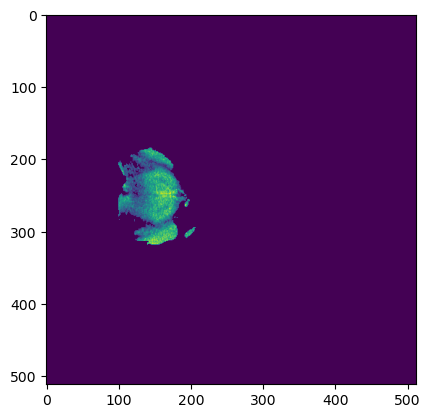

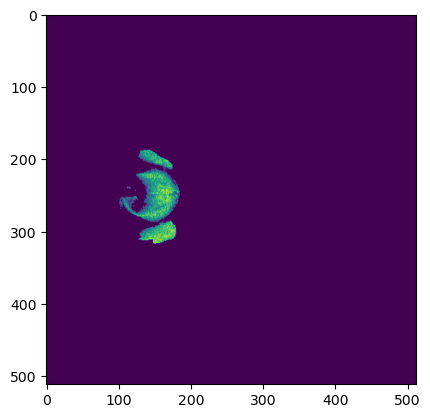

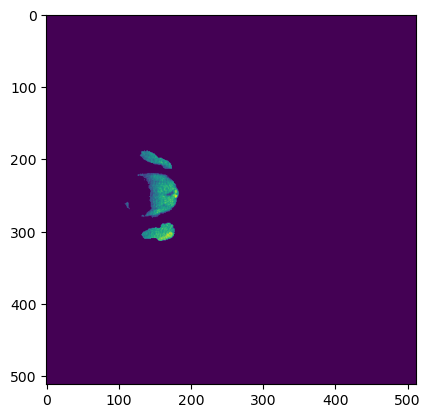

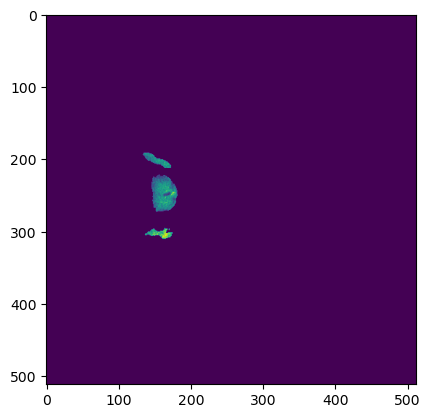

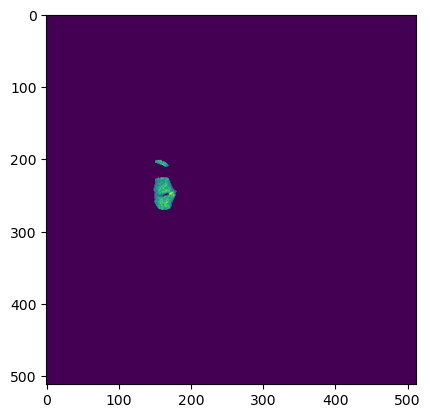

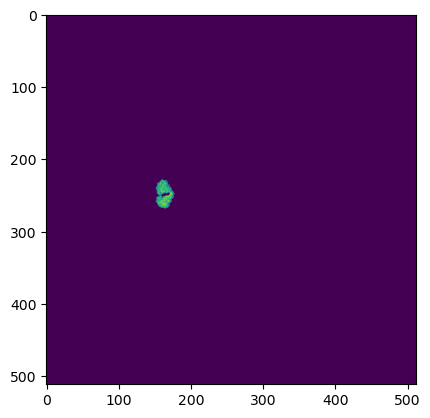

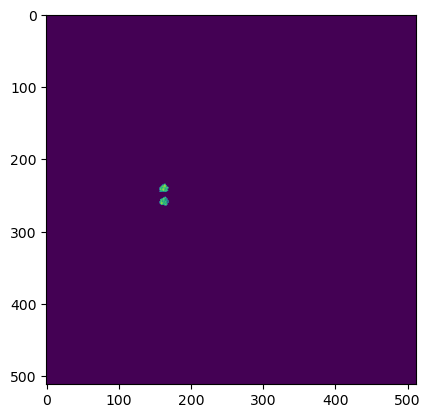

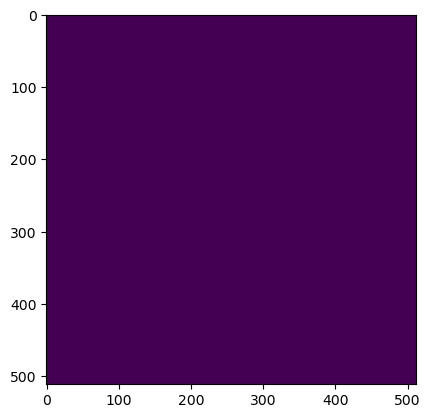

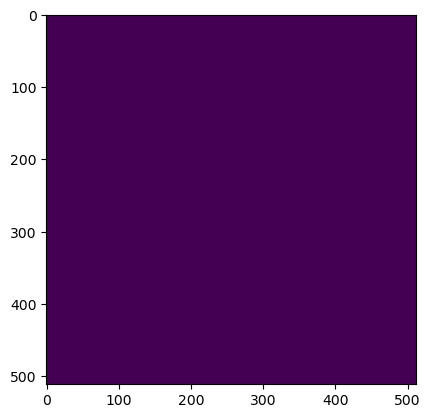

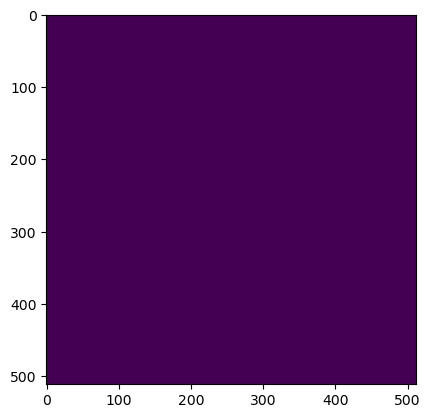

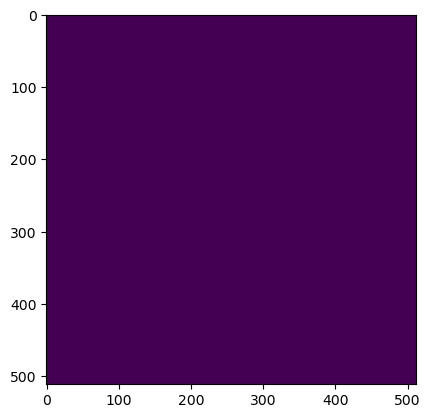

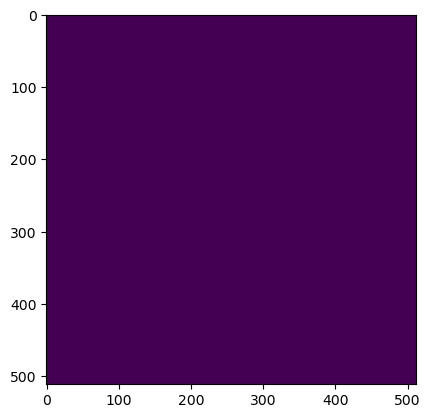

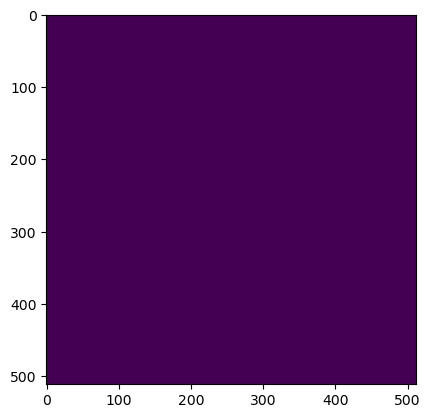

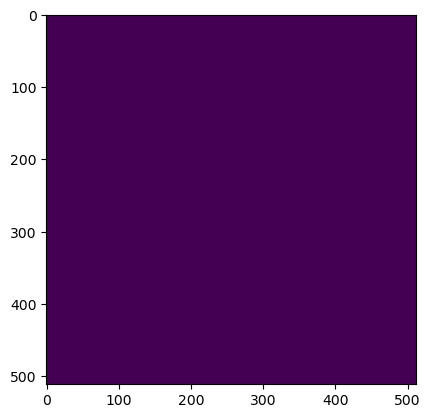

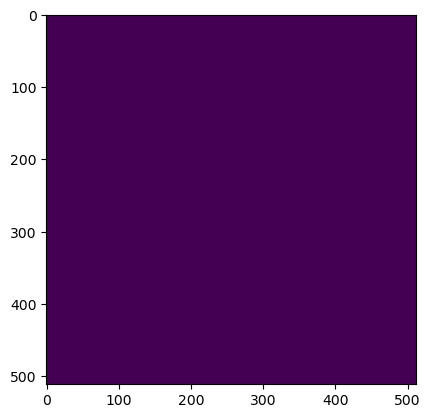

In [60]:
path2original="/Users/mri_registration/SAMRI/samri_output/rEO_05/bids/sub-rEO_05/ses-postop250823/anat/sub-rEO_05_ses-postop250823_task-rest_acq-T1Flash_T1w-ind_24_resampled.nii.gz"
nii_original, dataOriginal = read_data(path2original)

masked = mask_brain(data,mask)
show_data(masked)
path2save="/Users/mri_registration/SAMRI/samri_output/rEO_05/bids/sub-rEO_05/ses-postop250823/anat/sub-rEO_05_ses-postop250823_task-rest_acq-T1FlashMerged2_T1w-ind_30.nii.gz"

save_nii(data, nii_org, path2save)

In [57]:
np.max(mask)

1